In [1]:
using QuBase
using QuDynamics

In [2]:
using PyPlot

INFO: Loading help data...


In [3]:
wc = 1.0 * 2 * pi   # cavity frequency
wa = 1.0 * 2 * pi   # atom frequency
g  = 0.05 * 2 * pi  # coupling strength
kappa = 0.05        # cavity dissipation rate
gamma = 0.15        # atom dissipation rate
N = 2           # number of cavity fock states
use_rwa = true
# initial state
psi0 = complex(tensor(statevec(1, FiniteBasis(N)), statevec(2, FiniteBasis(2))))
# start with an excited atom
tlist = linspace(0, 30, 150);

In [4]:
# Hamiltonian
idc = QuArray(eye(N))
ida = QuArray(eye(2))
a  = tensor(lowerop(N), ida)
sm = tensor(idc, lowerop(2))
if use_rwa
    # use the rotating wave approxiation
    H = wc * a' * a + wa * sm' * sm + g * (a' * sm + a * sm')
else
    H = wc * a' * a + wa * sm' * sm + g * (a' + a) * (sm + sm')
end
H = full(H)

4x4 QuMatrix in FiniteBasis{Orthonormal}:
...coefficients: Array{Float64,2}
[0.0 0.0 0.0 0.0
 0.0 6.283185307179586 0.3141592653589793 0.0
 0.0 0.3141592653589793 6.283185307179586 0.0
 0.0 0.0 0.0 12.566370614359172]

In [5]:
# collapse operators
c_op_list = Array(QuBase.AbstractQuMatrix, 0)
n_th_a = 0.0 # zero temperature
rate_1 = kappa * (1 + n_th_a)
if rate_1 > 0.0
    push!(c_op_list, full(sqrt(rate_1) * a))
end
rate = kappa * n_th_a
if rate > 0.0
    push!(c_op_list, full(sqrt(rate) * a'))
end
rate = gamma
if rate > 0.0
    push!(c_op_list, full(sqrt(rate) * sm))
end
c_op_list

2-element Array{AbstractQuArray{B<:AbstractBasis{S<:AbstractStructure},T,2},1}:
 4x4 QuMatrix in FiniteBasis{Orthonormal}:
...coefficients: Array{Float64,2}
[0.0 0.0 0.22360679774997896 0.0
 0.0 0.0 0.0 0.22360679774997896
 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0]
 4x4 QuMatrix in FiniteBasis{Orthonormal}:
...coefficients: Array{Float64,2}
[0.0 0.3872983346207417 0.0 0.0
 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.3872983346207417
 0.0 0.0 0.0 0.0]  

In [6]:
lindblad = QuDynamics.lindblad_op(H, c_op_list)

16x16 QuMatrix in FiniteBasis{Orthonormal}:
...coefficients: SparseMatrixCSC{Complex{Float64},Int64}

	[2 ,  2]  =  6.28319-0.075im
	[3 ,  2]  =  0.314159+0.0im
	[2 ,  3]  =  0.314159+0.0im
	[3 ,  3]  =  6.28319-0.025im
	[4 ,  4]  =  12.5664-0.1im
	[5 ,  5]  =  -6.28319-0.075im
	[9 ,  5]  =  -0.314159+0.0im
	[1 ,  6]  =  0.0+0.15im
	[6 ,  6]  =  -0.0-0.15im
	[7 ,  6]  =  0.314159+0.0im
	[10,  6]  =  -0.314159+0.0im
	[6 ,  7]  =  0.314159+0.0im
	[7 ,  7]  =  -0.0-0.1im
	[11,  7]  =  -0.314159+0.0im
	[3 ,  8]  =  0.0+0.15im
	[8 ,  8]  =  6.28319-0.175im
	[12,  8]  =  -0.314159+0.0im
	[5 ,  9]  =  -0.314159+0.0im
	[9 ,  9]  =  -6.28319-0.025im
	[6 , 10]  =  -0.314159+0.0im
	[10, 10]  =  -0.0-0.1im
	[11, 10]  =  0.314159+0.0im
	[1 , 11]  =  0.0+0.05im
	[7 , 11]  =  -0.314159+0.0im
	[10, 11]  =  0.314159+0.0im
	[11, 11]  =  -0.0-0.05im
	[2 , 12]  =  0.0+0.05im
	[8 , 12]  =  -0.314159+0.0im
	[12, 12]  =  6.28319-0.125im
	[13, 13]  =  -12.5664-0.1im
	[9 , 14]  =  0.0+0.15im
	[14, 14]  =  -6.2

In [7]:
quexpmv = QuPropagator(H, c_op_list, psi0*psi0', tlist, QuExpmV())
for (t, psi) in quexpmv
    # time and the state
    # println("time : $t \n", "coefficients : ", coeffs(psi), "\ntrace : ", trace(psi), "\n");
end

In [8]:
quexpokit = QuPropagator(H, c_op_list, psi0*psi0', tlist, QuExpokit())
for (t, psi) in quexpokit
    # time and the state
    # println("time : $t \n", "coefficients : ", coeffs(psi), "\ntrace : ", trace(psi), "\n")
end

In [9]:
quode45 = QuPropagator(H, c_op_list, psi0*psi0', tlist, QuODE45())
for (t, psi) in quode45
    # time and the state
    # println("time : $t \n", "coefficients : ", coeffs(psi), "\ntrace : ", trace(psi), "\n")
end

In [10]:
quode78 = QuPropagator(H, c_op_list, psi0*psi0', tlist, QuODE78())
for (t, psi) in quode78
    # time and the state
    # println("time : $t \n", "coefficients : ", coeffs(psi), "\ntrace : ", trace(psi), "\n")
end

In [11]:
quode23s = QuPropagator(H, c_op_list, psi0*psi0', tlist, QuODE23s())
for (t, psi) in quode23s
    # time and the state
    # println("time : $t \n", "coefficients : ", coeffs(psi), "\ntrace : ", trace(coeffs(psi)), "\n")
end

In [12]:
qukrylov = QuPropagator(H, c_op_list, psi0*psi0', tlist, QuKrylov())
for (t, psi) in qukrylov
    # time and the state
    # println("time : $t \n", "coefficients : ", coeffs(psi), "\ntrace : ", trace(psi), "\n")
end

In [13]:
qucn = QuPropagator(H, c_op_list, psi0*psi0', tlist, QuCrankNicolson())
for (t, psi) in qucn
    # time and the state
    # println("time : $t \n", "coefficients : ", coeffs(psi), "\ntrace : ", trace(psi), "\n")
end

In [14]:
queuler = QuPropagator(H, c_op_list, psi0*psi0', tlist, QuEuler())
for (t, psi) in queuler
    # time and the state
    # println("time : $t \n", "coefficients : ", coeffs(psi), "\ntrace : ", trace(psi), "\n")
end

#### Expectation values for the observable tensor(idc, sigmaz) (red) and observable a*a'

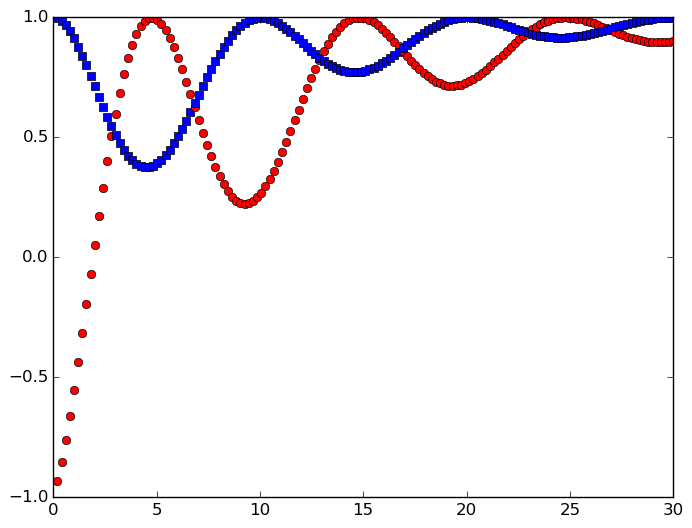

In [15]:
for (t, psi) in quexpmv
    # time and the state
    # println("time : $t \n", "state : ", coeffs(psi), "\nexpectation value (tensor(idc, sigmaz)): ", trace(psi*tensor(idc, sigmaz)), "\nexpectation value a*a' : ", trace(psi*a*a'), "\n")
    plot(t, real(trace(psi*tensor(idc, sigmaz))), "ro")
    plot(t, real(trace(psi*a*a')), "bs")
end

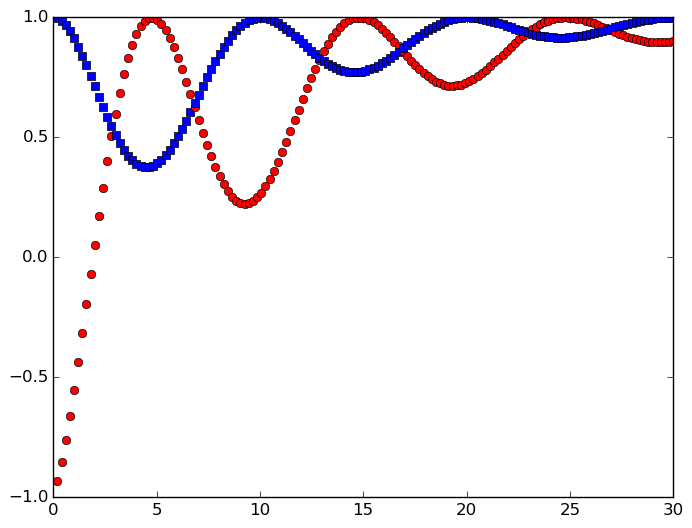

In [16]:
for (t, psi) in quexpokit
    # time and the state
    # println("time : $t \n", "state : ", coeffs(psi), "\nexpectation value (tensor(idc, sigmaz)): ", trace(psi*tensor(idc, sigmaz)), "\nexpectation value a*a' : ", trace(psi*a*a'), "\n")
    plot(t, real(trace(psi*tensor(idc, sigmaz))), "ro")
    plot(t, real(trace(psi*a*a')), "bs")
end

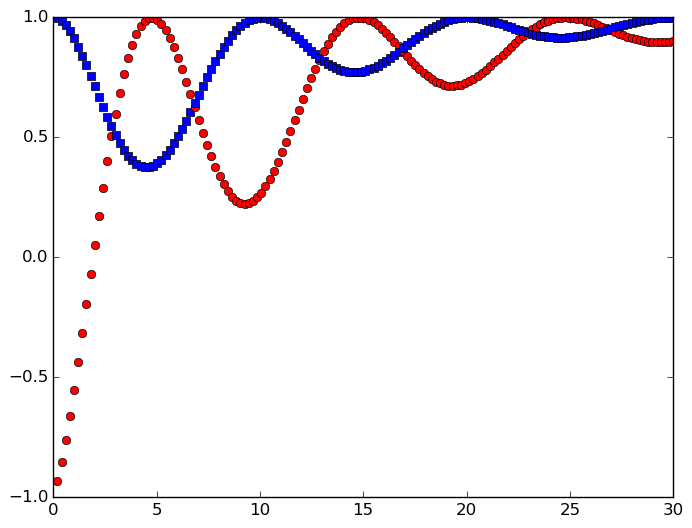

In [17]:
for (t, psi) in quode45
    # time and the state
    # println("time : $t \n", "state : ", coeffs(psi), "\nexpectation value (tensor(idc, sigmaz)): ", trace(psi*tensor(idc, sigmaz)), "\nexpectation value a*a' : ", trace(psi*a*a'), "\n")
    plot(t, real(trace(psi*tensor(idc, sigmaz))), "ro")
    plot(t, real(trace(psi*a*a')), "bs")
end

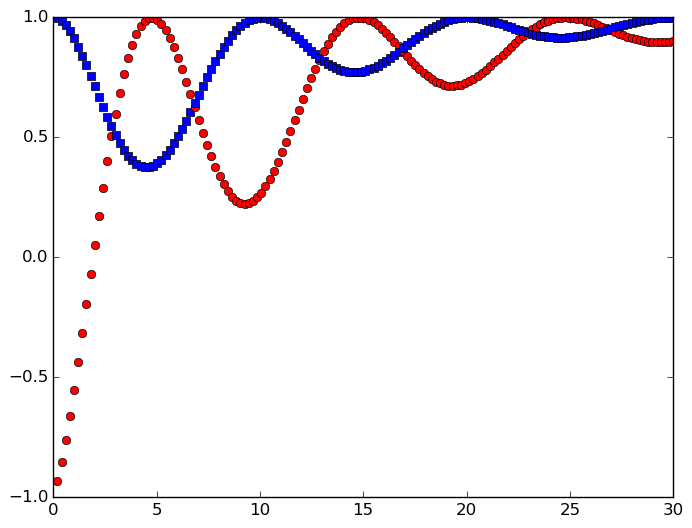

In [18]:
for (t, psi) in quode78
    # time and the state
    # println("time : $t \n", "state : ", coeffs(psi), "\nexpectation value (tensor(idc, sigmaz)): ", trace(psi*tensor(idc, sigmaz)), "\nexpectation value a*a' : ", trace(psi*a*a'), "\n")
    plot(t, real(trace(psi*tensor(idc, sigmaz))), "ro")
    plot(t, real(trace(psi*a*a')), "bs")
end

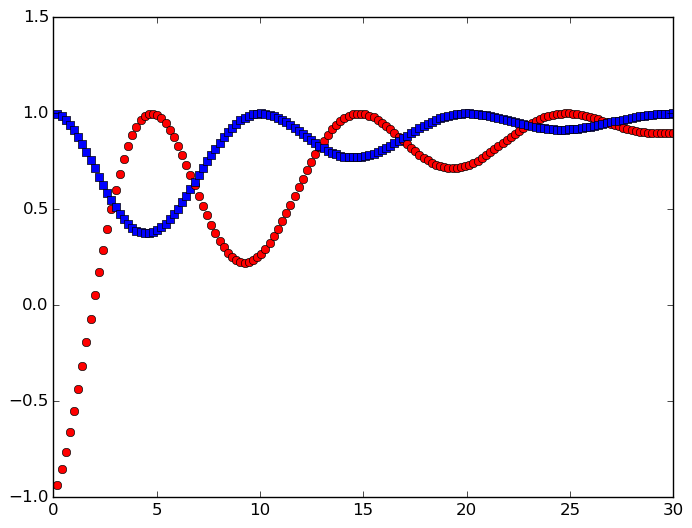

In [19]:
for (t, psi) in quode23s
    # time and the state
    # println("time : $t \n", "state : ", coeffs(psi), "\nexpectation value (tensor(idc, sigmaz)): ", trace(psi*tensor(idc, sigmaz)), "\nexpectation value a*a' : ", trace(psi*a*a'), "\n")
    plot(t, real(trace(psi*tensor(idc, sigmaz))), "ro")
    plot(t, real(trace(psi*a*a')), "bs")
end

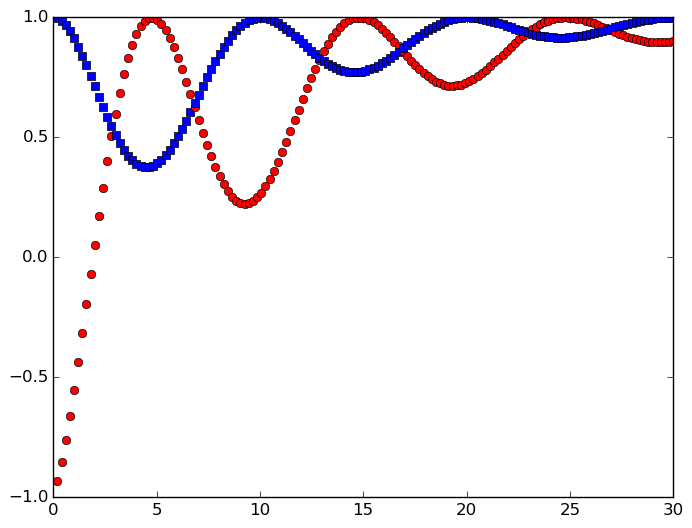

In [20]:
for (t, psi) in qukrylov
    # time and the state
    # println("time : $t \n", "state : ", coeffs(psi), "\nexpectation value (tensor(idc, sigmaz)): ", trace(psi*tensor(idc, sigmaz)), "\nexpectation value a*a' : ", trace(psi*a*a'), "\n")
    plot(t, real(trace(psi*tensor(idc, sigmaz))), "ro")
    plot(t, real(trace(psi*a*a')), "bs")
end

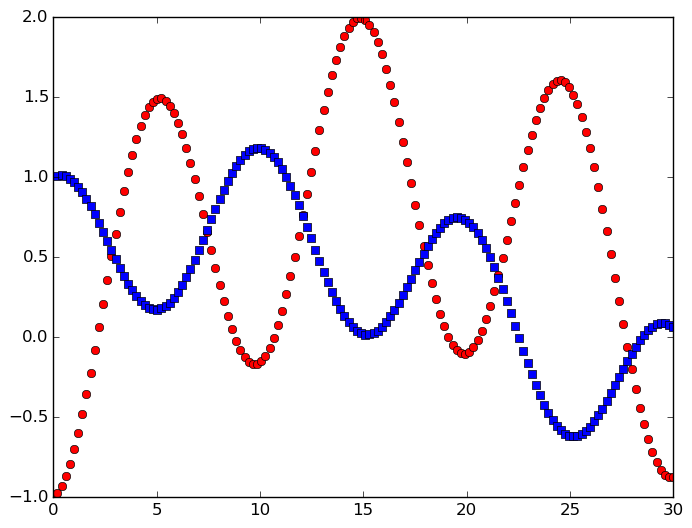

In [21]:
for (t, psi) in qucn
    # time and the state
    # println("time : $t \n", "state : ", coeffs(psi), "\nexpectation value (tensor(idc, sigmaz)): ", trace(psi*tensor(idc, sigmaz)), "\nexpectation value a*a' : ", trace(psi*a*a'), "\n")
    plot(t, real(trace(psi*tensor(idc, sigmaz))), "ro")
    plot(t, real(trace(psi*a*a')), "bs")
end

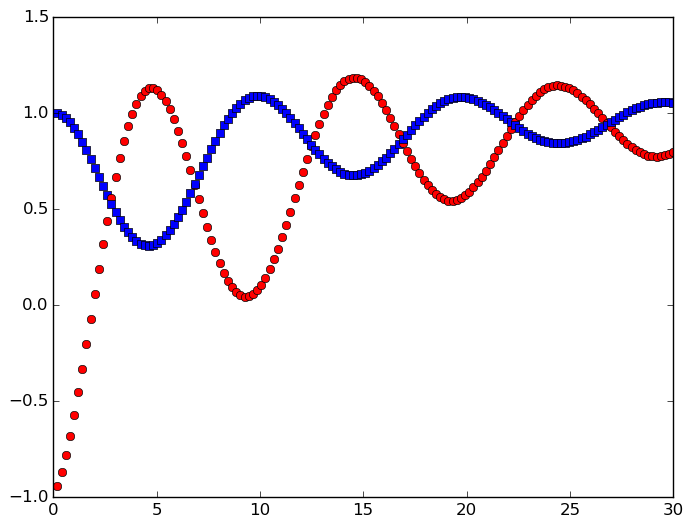

In [22]:
for (t, psi) in queuler
    # time and the state
    # println("time : $t \n", "state : ", coeffs(psi), "\nexpectation value (tensor(idc, sigmaz)): ", trace(psi*tensor(idc, sigmaz)), "\nexpectation value a*a' : ", trace(psi*a*a'), "\n")
    plot(t, real(trace(psi*tensor(idc, sigmaz))), "ro")
    plot(t, real(trace(psi*a*a')), "bs")
end

In [23]:
q = Array[]
push!(q, coeffs(vec(psi0*psi0')))
for (t, psi) in quexpmv
    push!(q, coeffs(vec(psi)))
end    

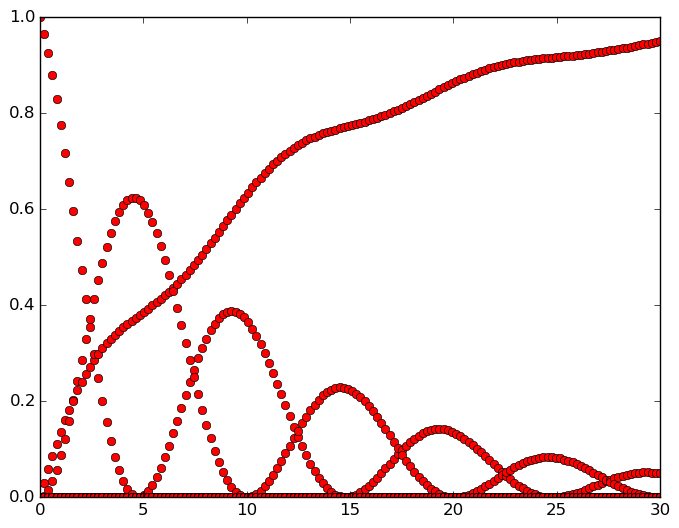

In [24]:
for i in 1:length(q)
    for j in 1:length(q[i])
        plot(tlist[i], real(q[i][j]), "ro")
    end
end

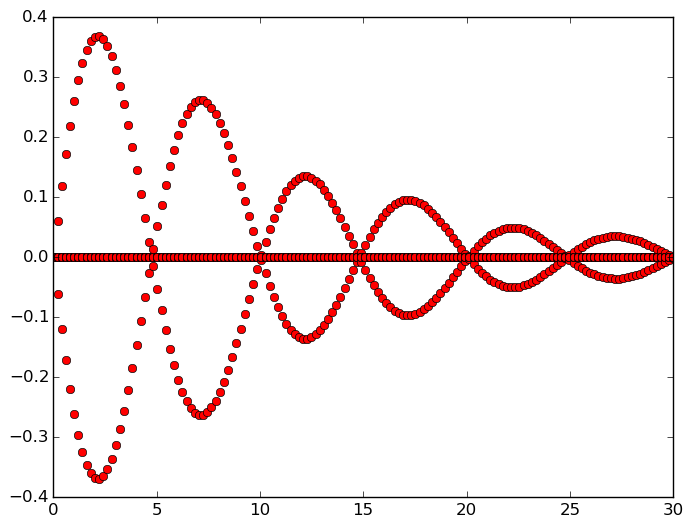

In [25]:
for i in 1:length(q)
    for j in 1:length(q[i])
        plot(tlist[i], imag(q[i][j]), "ro")
    end
end